In [ ]:
import pylab as pl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
import seaborn as sns
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# train_path = '/content/drive/MyDrive/IR Project CODEBASE/Dataset/train.csv' 
# test_path = '/content/drive/MyDrive/IR Project CODEBASE/Dataset/test.csv' 

data_path = "/content/drive/MyDrive/IR/Project/fer2013.csv"
#data_path = '/content/drive/Shareddrives/IR Project CODEBASE/Dataset/fer2013.csv' 
data = pd.read_csv(data_path)
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

## Preprocessing Images

In [ ]:
width, height = 48, 48
X_vals=[]
datapoints = data['pixels'].tolist()
data['emotion'] = data['emotion'].astype('int')
for i in datapoints:
  val = i.split(" ")
  val1 = [float(x)/255 for x in val]
  

  X_vals.append(val1)

data['normalized_pixels'] = X_vals



In [ ]:
train_data = data[data['Usage']=='Training'].drop(labels=['Usage'], axis=1)
train_data = train_data[['normalized_pixels','emotion']]
train_data.head()

,normalized_pixels,emotion
0,"[0.27450980392156865, 0.3137254901960784, 0.32...",0
1,"[0.592156862745098, 0.5882352941176471, 0.5764...",0
2,"[0.9058823529411765, 0.8313725490196079, 0.611...",2
3,"[0.09411764705882353, 0.12549019607843137, 0.1...",4
4,"[0.01568627450980392, 0.0, 0.0, 0.0, 0.0, 0.0,...",6


In [ ]:
val_data = data[data['Usage']=='PrivateTest'].drop(labels=['Usage'], axis=1)
val_data =val_data[['normalized_pixels','emotion']]
val_data.head()

,normalized_pixels,emotion
32298,"[0.6666666666666666, 0.4627450980392157, 0.396...",0
32299,"[0.027450980392156862, 0.0196078431372549, 0.0...",5
32300,"[0.9098039215686274, 0.9411764705882353, 0.945...",6
32301,"[0.7843137254901961, 0.7725490196078432, 0.584...",4
32302,"[0.1568627450980392, 0.10980392156862745, 0.12...",2


In [ ]:
test_data = data[data['Usage']=='PublicTest'].drop(labels=['Usage'], axis=1)
test_data =test_data[['normalized_pixels','emotion']]
test_data.head()

,normalized_pixels,emotion
28709,"[0.996078431372549, 0.996078431372549, 0.99607...",0
28710,"[0.611764705882353, 0.7215686274509804, 0.7764...",1
28711,"[0.27058823529411763, 0.4627450980392157, 0.23...",4
28712,"[0.803921568627451, 0.796078431372549, 0.92549...",6
28713,"[0.3411764705882353, 0.30980392156862746, 0.29...",3


In [ ]:

Y_train = train_data["emotion"]
Y_val = val_data["emotion"]
Y_test = test_data["emotion"]
#'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'#

X_train = train_data["normalized_pixels"]
X_val = val_data["normalized_pixels"]
X_test = test_data["normalized_pixels"]

In [ ]:
print("Training shape---->",X_train.shape,Y_train.shape)
print("Validation shape---->",X_val.shape,Y_val.shape)
print("Testing shape---->",X_test.shape,Y_test.shape)


Training shape----> (28709,) (28709,)
Validation shape----> (3589,) (3589,)
Testing shape----> (3589,) (3589,)


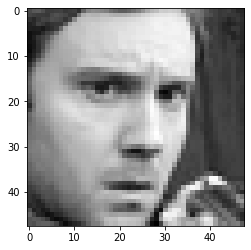

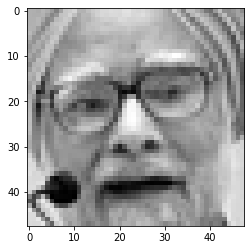

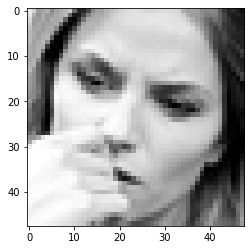

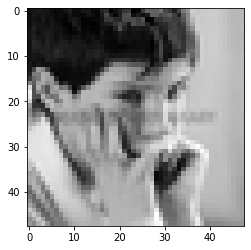

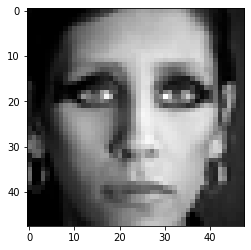

In [ ]:
for i in range(5):
  plt.figure(i)
  plt.imshow(np.array(X_train[i]).reshape((48, 48)), interpolation='none', cmap='gray')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts per emotion in testing set')

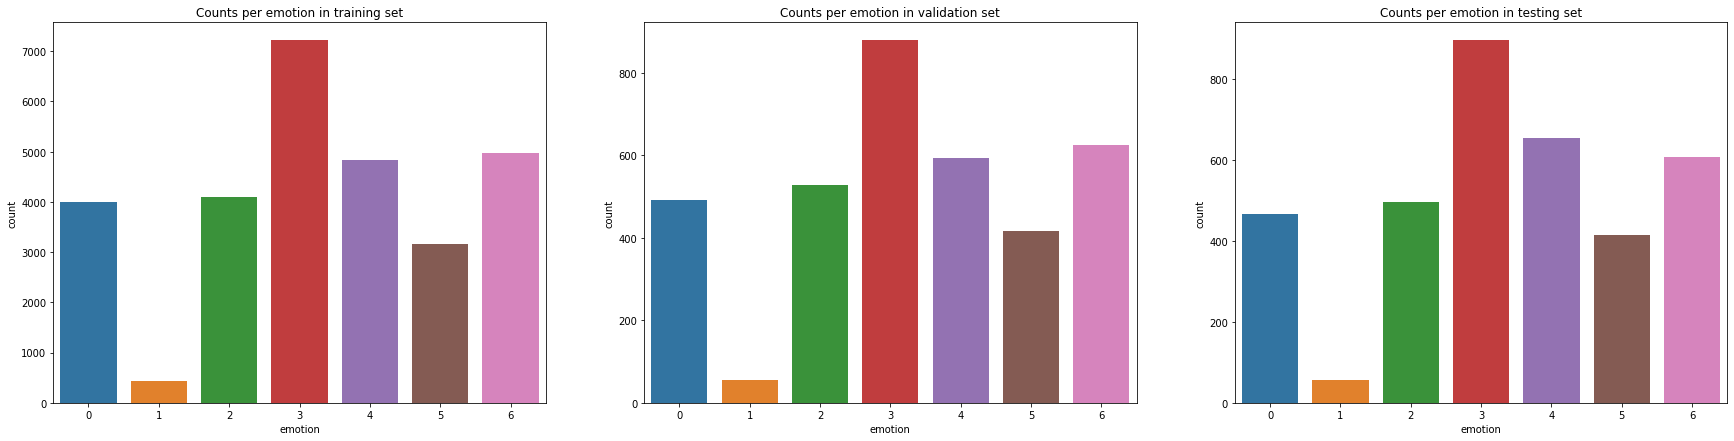

In [ ]:
plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
ax = sns.countplot(Y_train)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in training set")

plt.subplot(1,3,2)
ax = sns.countplot(Y_val)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in validation set")

plt.subplot(1,3,3)
ax = sns.countplot(Y_test)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in testing set")

# **KNN**

### DONE LOCALLY AND SAVED THE MODEL AND PREDS


In [ ]:
neighbors=range(1,5)
max_acc = 0
for n in neighbors:
  clf = KNeighborsClassifier(n_neighbors = n)
  X_train1 =X_train.tolist()
  clf.fit(X_train1, Y_train)
  X_test1 = X_test.tolist() 
  
  y_pred = clf.predict(X_test1)
  #training_score = clf.score(X_train, Y_train)
  test_score = clf.score(X_test1, Y_test)
  print(test_score)
  acc = accuracy_score(y_pred,Y_test)
  print("Accuracy: ",acc)
  if(acc>max_acc):
    max_acc = acc
    joblib.dump(clf,'model.joblib')
  


0.40234048481471163
Accuracy:  0.40234048481471163
0.35664530509891335
Accuracy:  0.35664530509891335
0.33937029813318476
Accuracy:  0.33937029813318476
0.3371412649763165
Accuracy:  0.3371412649763165


Loading and Running the model on test data

In [ ]:
X_test = X_test.tolist()
clf = joblib.load("KNN_baseline_model.joblib")
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_pred,Y_test)
print("Test Accuracy : ",test_score)

Test Accuracy :  0.40234048481471163
